# Quantatively analyze contrast
Let's use the functions you've learned with Brian to look at some landsat data

In [1]:
"""now lets use the landsat functions 
to look at the downloaded data

this is a transcription of landsat_display.py
"""
import landsat_sample_functions as lf

In [2]:
rgbdatafile = "../data/landsat_RGBN.txt"
#read in landsat data
rgbn = lf.landsat_read(rgbdatafile)

In [3]:
#let's look at the contents of rgbn
rgbn[0] #first row of the rgbn array

array([[0.108, 0.115, 0.14 , 0.185],
       [0.095, 0.104, 0.114, 0.196],
       [0.088, 0.098, 0.113, 0.178],
       ...,
       [0.078, 0.092, 0.113, 0.07 ],
       [0.076, 0.091, 0.111, 0.067],
       [0.077, 0.091, 0.112, 0.067]])

In [4]:
dimensions = rgbn.shape
print('dimensions of rgbn = {}'.format(dimensions))

"""
trim to rgb by slicing off last channel
: means take all values in that dim
0:3 means take 0, 1, 2 - slicing stops 1 before last
"""
rgb = rgbn[:, :, 0:3]

rgb.shape

dimensions of rgbn = (815, 921, 4)


(815, 921, 3)

# What do the dimensions mean?

(number of rows, number of columns, channels)
 
* 815 rows, 921 columns, and 3 channels
* 815 x 921 is the image size, 
* 3 channels = red, green, blue

![numpy](https://github.com/story645/EAS213/raw/master/2016/figs/axis.png)

In [5]:
# lets set up inline plotting
%matplotlib notebook

<IPython.core.display.Javascript object>


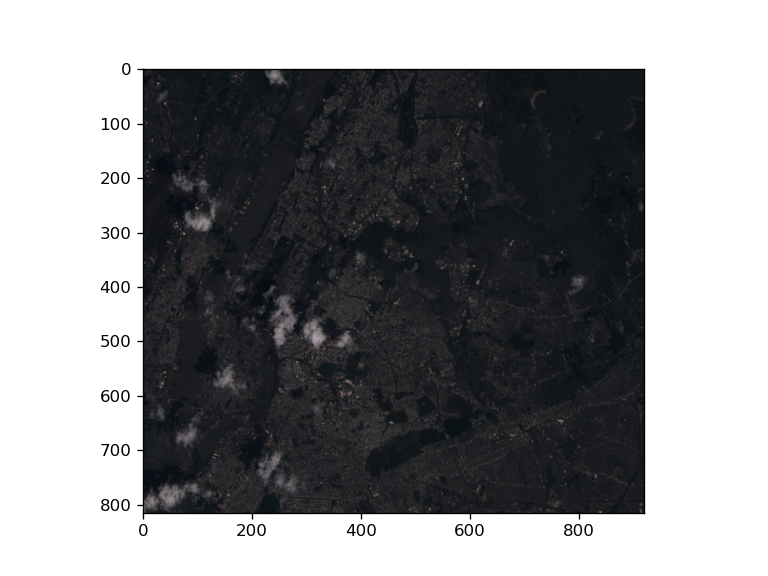

Enter Contrast, 0 to exit: .25


In [7]:
#let's see the pictures in the notebook
rgbc = lf.rgb_display(rgb)

In [9]:
rgbc[0] # first row of rgbc

array([[0.108, 0.115, 0.14 ],
       [0.095, 0.104, 0.114],
       [0.088, 0.098, 0.113],
       ...,
       [0.078, 0.092, 0.113],
       [0.076, 0.091, 0.111],
       [0.077, 0.091, 0.112]])

In [10]:
# alternative to rgb_display:
def rgb_contrast(rgb_array, contrast):
    """returns an RGB image adjusted based
    on contrast level
    """
    rgbc_array = rgb_array * contrast
    low = (rgbc_array < 0)
    rgbc_array[low] = 0

    high = (rgbc_array > 1)
    rgbc_array[high] = 1
    
    return rgbc_array

In [12]:
rgbc = rgb_contrast(rgb, 3)
rgbc[0]

array([[0.324, 0.345, 0.42 ],
       [0.285, 0.312, 0.342],
       [0.264, 0.294, 0.339],
       ...,
       [0.234, 0.276, 0.339],
       [0.228, 0.273, 0.333],
       [0.231, 0.273, 0.336]])

# Is there's a difference between the two arrays?

![mpl anatomy figure](mpl_anatomy.png)

<IPython.core.display.Javascript object>


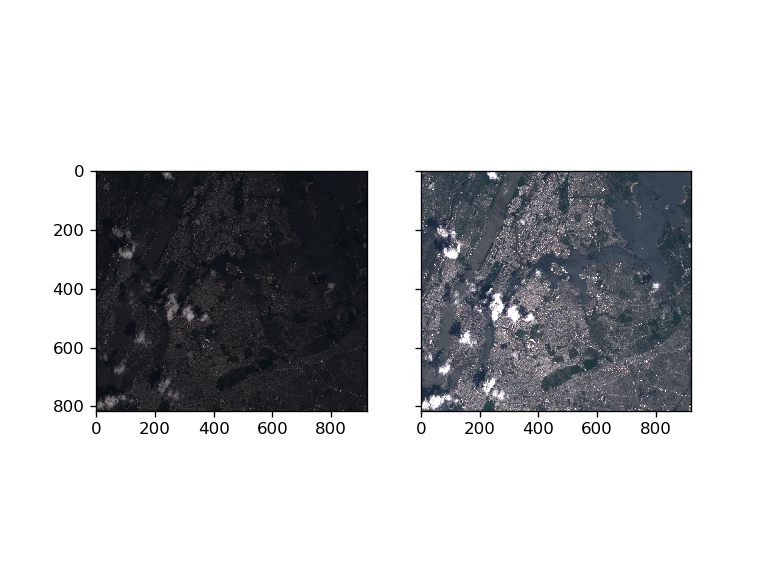

In [14]:
#let's compare the plots side by side

import matplotlib.pyplot as plt

# create an image and add two subplots to it
# arrange those subplots into cols
# sharex and sharey so that panning and zooming are synced
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)

# plot the rgb array
ax1.imshow(rgb)

# plot the rgbc array
ax2.imshow(rgbc)

fig.show()

<IPython.core.display.Javascript object>


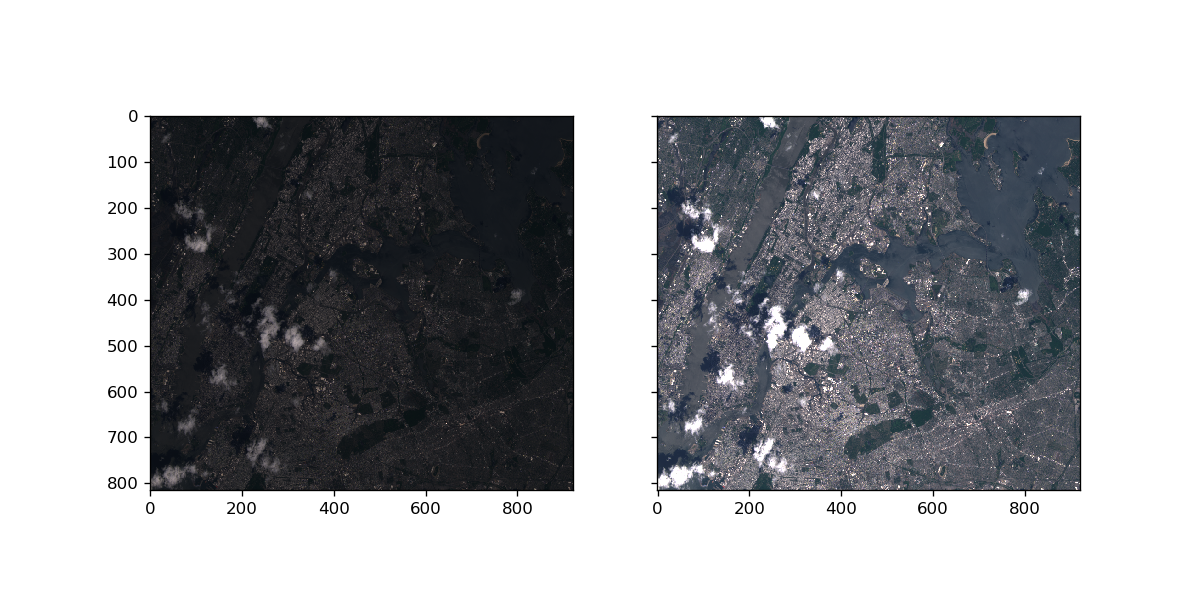

In [15]:
#figsize = (width, height) makes the figure bigger/smaller
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)

ax1.imshow(rgb)
ax2.imshow(rgbc)

fig.show()

# How'd that happen?
Each image is made up of 3 channels, so let's look at how the channels changed. 

How do we pull out channels? Each layer of the array (that 3rd dimension) is a color, so we grab individual layers. 

In [16]:
# Channel is the last dimension 
# computer scientists count from 0
# : means give all the values (all rows & columns)
red = rgb[:,:,0]
# can also use ... to mean everything 
green = rgb[...,1]
blue = rgb[...,2]

<IPython.core.display.Javascript object>


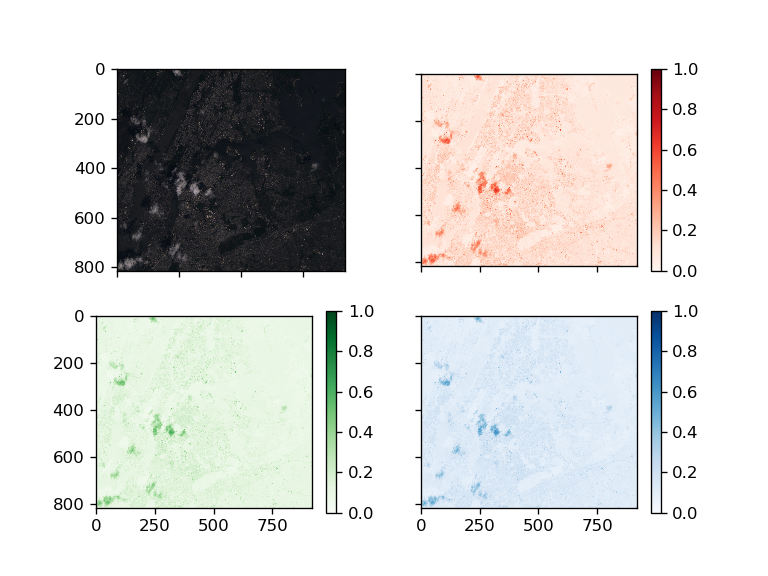

/Users/hannah/miniconda3/envs/hires/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [17]:
# plot each of the individual channels and compare to image
# arrange the subplots as a 2x2 table
# sharex/sharey zooms all the images when 1 is zoomed
fig, axes = plt.subplots(nrows=2, ncols=2, 
                         sharex=True, sharey=True)

"""axes is a numpy array of shape (2,2) and has coordinates
  [(0,0), (0,1)]
  [(1,0), (1,1)]
"""
# plot rbc in the upper left corner 
im = axes[0,0].imshow(rgb)

# plot the red channel in the upper right corner
# color it from white to red
# 0 and below = lightest red, 1 and above = darkest red
# between 0-1 is along the red gradient (normalization)
r = axes[0,1].imshow(red, cmap="Reds", vmin=0, vmax=1)
# attach a colorbar to the red channel image & axes
fig.colorbar(r, ax=axes[0,1])

# plot the green channel
g = axes[1,0].imshow(green, cmap="Greens", vmin=0, vmax=1)
fig.colorbar(g, ax=axes[1,0])

# plot the blue channel
b = axes[1,1].imshow(blue, cmap="Blues", vmin=0, vmax=1)
fig.colorbar(b, ax=axes[1,1])

fig.show()

#clean up the plots so they're the right size
for ax in axes.flatten():
    ax.set_adjustable('box-forced')

In [18]:
# let's make functions to simplify, maybe...

def plot_channel(fig, ax, data, cmap):
    im = ax.imshow(data, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(im, ax=ax)


<IPython.core.display.Javascript object>


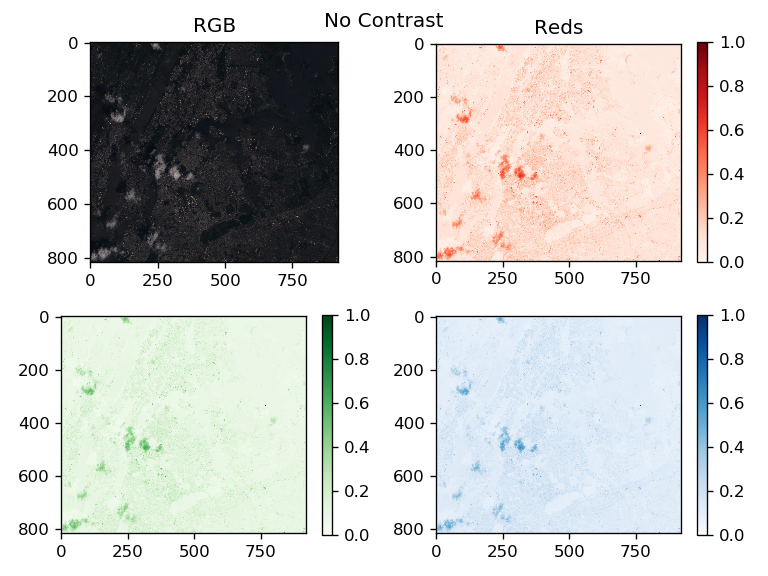

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)

rgb_im = axes[0,0].imshow(rgb)

plot_channel(fig, axes[0,1], red, "Reds")
plot_channel(fig, axes[1,0], green, "Greens")
plot_channel(fig, axes[1,1], blue, "Blues")

fig.suptitle("No Contrast") # set the figure title (super title)
axes[0,0].set_title("RGB") # set the axes[0,0] title
axes[0,1].set(title="Reds") # set the axes[0,1] title

for ax in axes.flatten():
    ax.set_adjustable('box-forced')
fig.show()

plt.tight_layout() #spreads out subplots

# To do: 
Use the same visualization code to visualize the 3 channels of the contrasted (rgbc) image

# More quantative way of computing differences?

![distro](https://github.com/story645/EAS213/raw/master/2016/figs/distro.jpg)

<IPython.core.display.Javascript object>


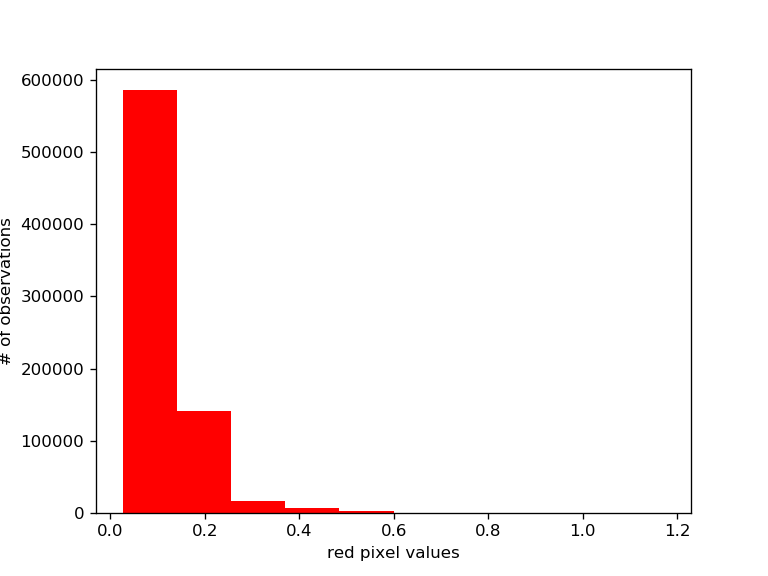

In [21]:
# let's start with a histogram of the red channel...

fig, ax = plt.subplots()

"""flatten takes a row X column table (or something even more complicate)
and turns it into a list"""
# coloring it red just for simplicity
ax.hist(red.flatten(), bins=10, color="red")

#let's label all the things
ax.set(xlabel="red pixel values", ylabel="# of observations")     
fig.show()

In [ ]:
# What does changing the bin size do?

fig, ax = plt.subplots()

ax.hist(red.flatten(), bins=10, color="hotpink")
ax.hist(red.flatten(), bins=100, color="red")

ax.set(xlabel="red pixel values", ylabel="# of observations")     
fig.show()

<IPython.core.display.Javascript object>


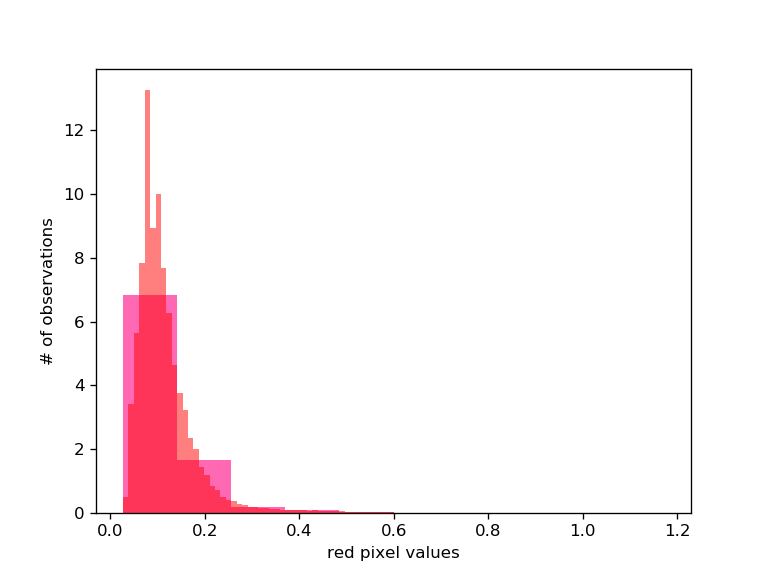

/Users/hannah/miniconda3/envs/hires/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [22]:
# Huh? same are under curve: 1 red bin = 10 pink bins
# Can see this by using normed=True to equalize

fig, ax = plt.subplots()

ax.hist(red.flatten(), bins=10, normed=True, color="hotpink")
#alpha sets the opacity/transluceny of the thing being plotted
ax.hist(red.flatten(), bins=100, normed=True, color="red", alpha=.5)

ax.set(xlabel="red pixel values", ylabel="# of observations")     
fig.show()

In [23]:
# rough bin size rule? 2*n^(1/3)
2*red.size**(1./3)

181.761713676356

<IPython.core.display.Javascript object>


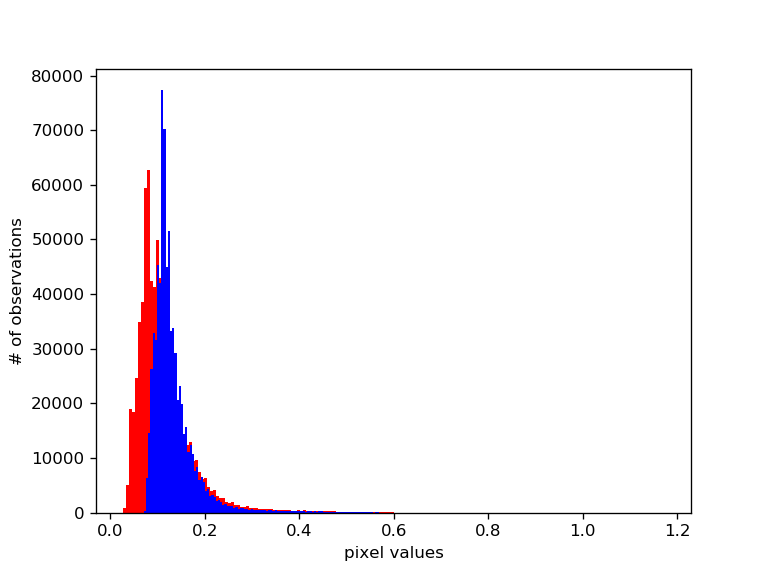

In [24]:
# blue channel?

fig, ax = plt.subplots()
ax.hist(red.flatten(), bins=180, color="red")

ax.hist(blue.flatten(), bins=180, color="blue")

ax.set(xlabel="pixel values", 
       ylabel="# of observations")
fig.show()

<IPython.core.display.Javascript object>


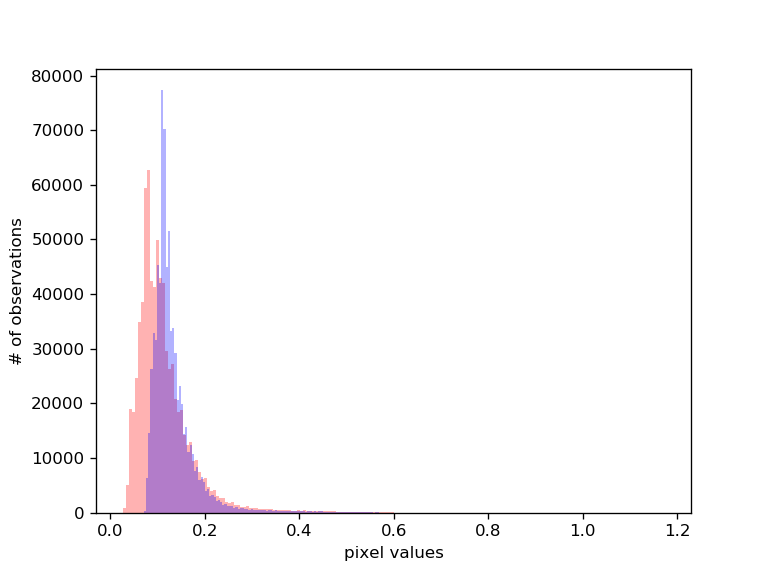

In [25]:
# eek! let's use alpha to make things transparent
fig, ax = plt.subplots()
ax.hist(red.flatten(), bins=180, color="red", alpha=0.3)
ax.hist(blue.flatten(), bins=180, color="blue", alpha=0.3)

ax.set(xlabel="pixel values", 
       ylabel="# of observations")
fig.show()

# To do
* Plot histogram for green channel
* Plot histogram for channels in contrasted data
* Compare histograms of contrasted and raw images

# solution

<IPython.core.display.Javascript object>


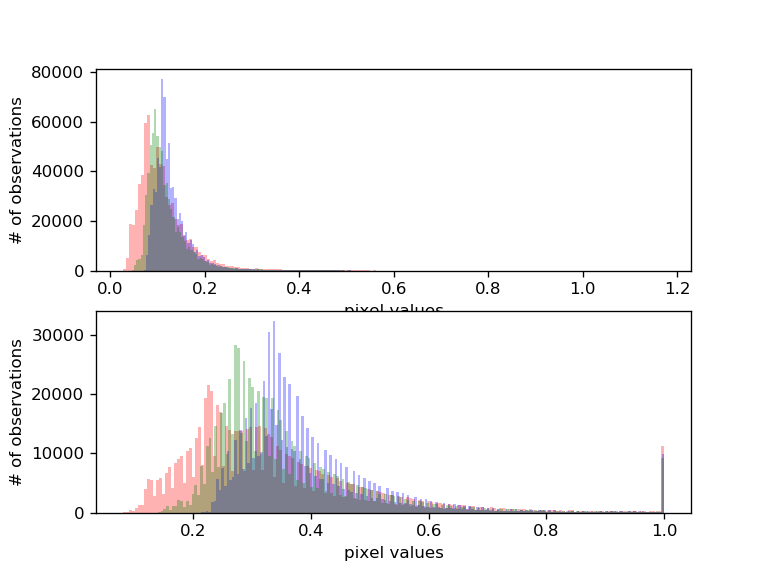

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(red.flatten(), bins=180, color="red", alpha=0.3)
ax1.hist(blue.flatten(), bins=180, color="blue", alpha=0.3)
ax1.hist(green.flatten(), bins=180, color='green', alpha=0.3)
ax1.set(xlabel="pixel values", ylabel="# of observations")

redc = rgbc[:,:,0]
greenc = rgbc[:,:,1]
bluec = rgbc[:,:,2]

ax2.hist(redc.flatten(), bins=180, color="red", alpha=0.3)
ax2.hist(bluec.flatten(), bins=180, color="blue", alpha=0.3)
ax2.hist(greenc.flatten(), bins=180, color='green', alpha=0.3)
ax2.set(xlabel="pixel values", ylabel="# of observations")
fig.show()

# How do we go from frequencies to distributions?

histograms are raw counts = frequencies,
distributions are the probabilities of events occuring

We use density estimation to trace a curve over the histogram

In [31]:
import scipy.stats as st
import numpy as np

"""estimate the probability function  for red channel pixels, 
which means P(red channel pixel) = probability of that pixel
being that value"""

Pred = st.gaussian_kde(red.flatten())


# color values range between 0 - 1 

# generate a 100 pixels equally spaced between 0 and 1
# this is an estimation of all possible pixel values
pixel_values = np.linspace(0,1,100) 

# pass each of those values into the probability function 
# to find the likelihood of it happening
pixel_probs_red = Pred(pixel_values) 

<IPython.core.display.Javascript object>


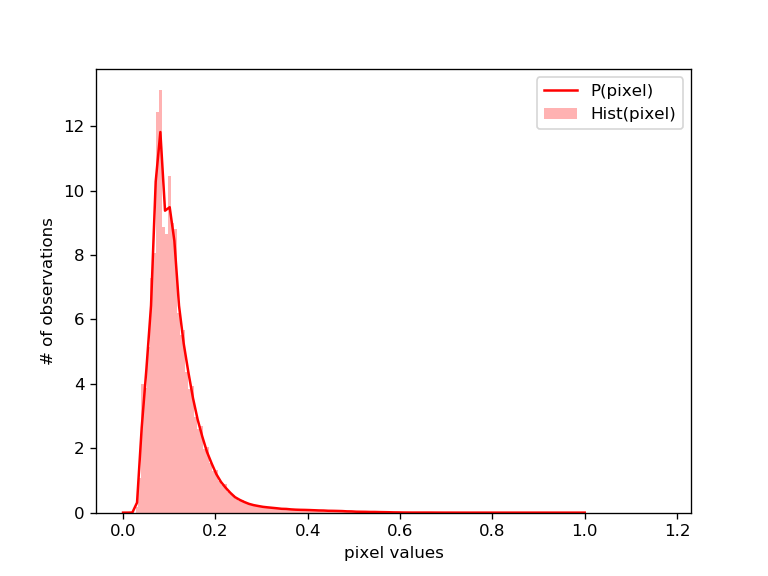

In [32]:
fig, ax = plt.subplots()

"""normed=True takes the histogram and puts it on a
0-1 scale. This is to match the probability function since 
0 = lowest probability, 1 = highest probability
"""

# use the label keyword to label the plot
ax.hist(red.flatten(), bins=180, color="red",normed=True,
        alpha=0.3, label="Hist(pixel)")

ax.plot(pixel_values, pixel_probs_red, 
        color="red", label="P(pixel)")

ax.set(ylabel="# of observations", xlabel="pixel values")

ax.legend() #add the legend to the image
fig.show()



# To Do
* Compute and plot the distributions of the green and blue channels
* Compute and plot the distributions of the channels for rgbc
* Discuss the differences between the uncontrasted and contrasted images
